In [47]:
from pathlib import Path
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

data_path = Path.cwd() / ".data"
assert data_path.exists()

In [48]:
list(f"{pth.stem}{pth.suffix}" for pth in data_path.glob("*"))

['sea_ice_n.csv',
 'co2_mlo_surface-insitu_1_ccgg_DailyData.csv',
 'rad_muc_hirsch.csv',
 'prison_population.csv',
 'co2_mlo_surface-insitu_1_ccgg_DailyData_no_meta.csv',
 'rad_muc_margareten.csv',
 'co2_spo.csv',
 'sea_ice_s.csv']

In [57]:
columns = [
    "site_code", "year", "month", "day", "hour", "minute", "second", "datetime",
    "time_decimal", "midpoint_time", "value", "value_std_dev", "nvalue",
    "latitude", "longitude", "altitude", "elevation", "intake_height", "qcflag"
]

df = pd.read_csv(
    data_path / "co2_mlo_surface-insitu_1_ccgg_DailyData.csv",
    delim_whitespace=True,
    header=None,
    skiprows=159,  # Skip the header lines
    names=columns,
)
df

/var/folders/yl/_h6j91qd4d30w8vyy7hnlvjh0000gn/T/ipykernel_83435/1977971035.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


,site_code,year,month,day,hour,minute,second,datetime,time_decimal,midpoint_time,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,qcflag
0,MLO,1974,1,1,0,0,0,1974-01-01T00:00:00Z,1974.000000,126273600,-999.99,-99.99,0,19.536,-155.576,3387.1,3397.0,-9.9,*..
1,MLO,1974,1,2,0,0,0,1974-01-02T00:00:00Z,1974.002740,126360000,-999.99,-99.99,0,19.536,-155.576,3387.1,3397.0,-9.9,*..
2,MLO,1974,1,3,0,0,0,1974-01-03T00:00:00Z,1974.005479,126446400,-999.99,-99.99,0,19.536,-155.576,3387.1,3397.0,-9.9,*..
3,MLO,1974,1,4,0,0,0,1974-01-04T00:00:00Z,1974.008219,126532800,-999.99,-99.99,0,19.536,-155.576,3387.1,3397.0,-9.9,*..
4,MLO,1974,1,5,0,0,0,1974-01-05T00:00:00Z,1974.010959,126619200,-999.99,-99.99,0,19.536,-155.576,3387.1,3397.0,-9.9,*..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18392,MLO,2024,4,27,0,0,0,2024-04-27T00:00:00Z,2024.319672,1714219200,428.19,0.11,4,19.536,-155.576,3437.0,3397.0,40.0,...
18393,MLO,2024,4,27,0,0,0,2024-04-27T00:00:00Z,2024.319672,1714219200,-999.99,-99.99,0,19.536,-155.576,3387.1,3397.0,-9.9,*..
18394,MLO,2024,4,28,0,0,0,2024-04-28T00:00:00Z,2024.322404,1714305600,427.44,0.40,12,19.536,-155.576,3437.0,3397.0,40.0,...
18395,MLO,2024,4,29,0,0,0,2024-04-29T00:00:00Z,2024.325137,1714392000,425.85,0.17,15,19.536,-155.576,3437.0,3397.0,40.0,...


In [39]:
def filter_na(df: pd.DataFrame, col: str) -> pd.DataFrame:
    num_na = df[col].isna().sum()
    print(f"Dropped {num_na.sum()} NA values, subset: {col}")

    return df.dropna(subset=[col])


df = pd.read_csv(data_path / "co2_mlo_surface-insitu_1_ccgg_DailyData_no_meta.csv", sep=";")
df = (
    df
    .assign(
        date=pd.to_datetime(df[["year", "month", "day"]])
        )
    .assign(ice=pd.to_numeric(df['ice'], errors='coerce')) # coerce: invalid parsing will be set as NaN
    .pipe(filter_na, "ice")
)

df.head()

Dropped 116 NA values, subset: ice


,Unnamed: 0,year,month,day,ice,date
0,1,1972,1,1,14449000.0,1972-01-01
1,2,1972,1,2,14541400.0,1972-01-02
2,3,1972,1,3,14633900.0,1972-01-03
3,4,1972,1,4,14716100.0,1972-01-04
4,5,1972,1,5,14808500.0,1972-01-05


<Axes: xlabel='year', ylabel='ice'>

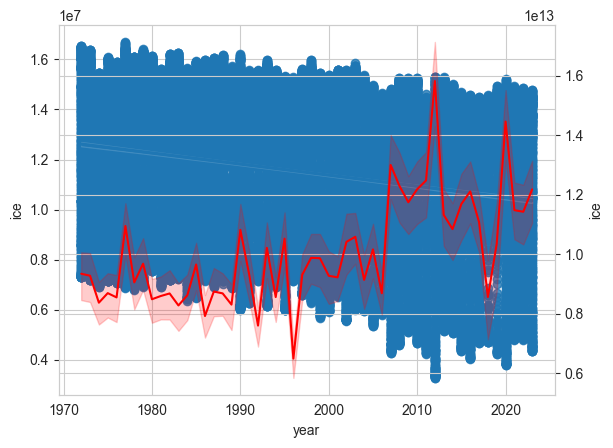

In [46]:
ax = sns.lineplot(data=df, x="year", y="ice")
# plot var on a new y axis
sns.lineplot(data=df, x="year", y="ice", estimator="var", ax=ax.twinx(), color="red")